In [1]:
import pickle
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from tqdm import tqdm
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import warnings

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [233]:
# with open('X_data.pkl','rb') as file:
#     x = pickle.load(file)
# with open('Y_data.pkl','rb') as file:
#     y = pickle.load(file)
# with open('zie_data.pkl','rb') as file:
#     z = pickle.load(file)

In [336]:
# with open('Xnew_data.pkl','rb') as file:
#     x = pickle.load(file)
# with open('Ynew_data.pkl','rb') as file:
#     y = pickle.load(file)
# with open('zienew_data.pkl','rb') as file:
#     z = pickle.load(file)

In [3]:
with open('X_uniform.pkl','rb') as file:
    x = pickle.load(file)
with open('Y_uniform.pkl','rb') as file:
    y = pickle.load(file)
with open('zie_uniform.pkl','rb') as file:
    zie = pickle.load(file)

In [4]:
x, x.shape

(tensor([[ 1.7103,  1.7103,  1.7103,  ..., -6.8445, -6.8445, -6.8445],
         [ 8.5300,  8.5300,  8.5300,  ..., -6.3845, -6.3845, -6.3845],
         [-6.0266, -6.0266, -6.0266,  ..., -7.0155, -7.0155, -7.0155],
         ...,
         [ 6.9653,  6.9653,  6.9653,  ...,  5.1985,  5.1985,  5.1985],
         [-8.4326, -8.4326, -8.4326,  ...,  8.8994,  8.8994,  8.8994],
         [-3.3060, -3.3060, -3.3060,  ..., -8.7325, -8.7325, -8.7325]]),
 torch.Size([2500, 40000]))

In [5]:
y

tensor([[ 8.0409,  8.0409,  8.0409,  ..., -8.5875, -8.5875, -8.5875],
        [-4.0732, -4.0732, -4.0732,  ...,  9.5276,  9.5276,  9.5276],
        [ 4.6791,  4.6791,  4.6791,  ...,  3.8848,  3.8848,  3.8848],
        ...,
        [-2.8629, -2.8629, -2.8629,  ...,  8.8056,  8.8056,  8.8056],
        [ 2.5266,  2.5266,  2.5266,  ...,  1.5282,  1.5282,  1.5282],
        [-9.1332, -9.1332, -9.1332,  ..., -8.2617, -8.2617, -8.2617]])

In [7]:
zie.shape

(40000,)

In [4]:
zie = zie.reshape(-1,1)
print(zie)

[[0.12230009]
 [0.12232882]
 [0.12240062]
 ...
 [0.08608111]
 [0.08619601]
 [0.08633962]]


Text(0, 0.5, 'Frequency')

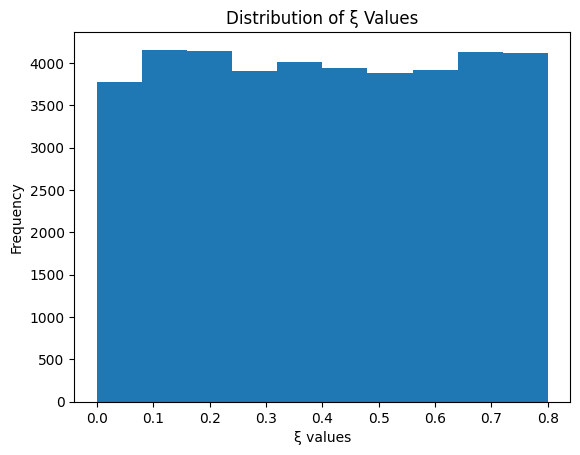

In [5]:
plt.hist(zie)
plt.title("Distribution of ξ Values")
plt.xlabel('ξ values')
plt.ylabel('Frequency')

In [6]:
x = x.numpy()
y = y.numpy()

In [10]:
# inp = []
# listi = []
# for i in range(50000):
#     if (i%250>=50 and i%250<=150):
#         temp = np.concatenate((x[:,i],y[:,i]))
#         inp.append(temp)
#         listi.append(i)

In [11]:
# len(listi)

20200

In [12]:
# z = []
# for i in range(20200):
#     z.append(zei[listi[i]])

In [7]:
inp = []
for i in range(40000):
    temp = np.concatenate((x[:,i],y[:,i]))
    inp.append(temp)

In [8]:
inp = np.array(inp)

In [9]:
inp.shape

(40000, 5000)

In [10]:
inp[:4], inp[:4].mean(axis=0), inp[:4].std(axis=0), inp[:4].max(axis=0), inp[:4].min(axis=0)

(array([[ 1.7102509,  8.530041 , -6.026571 , ..., -2.8629255,  2.5265617,
         -9.133181 ],
        [ 1.7102509,  8.530041 , -6.026571 , ..., -2.8629255,  2.5265617,
         -9.133181 ],
        [ 1.7102509,  8.530041 , -6.026571 , ..., -2.8629255,  2.5265617,
         -9.133181 ],
        [ 1.7102509,  8.530041 , -6.026571 , ..., -2.8629255,  2.5265617,
         -9.133181 ]], dtype=float32),
 array([ 1.7102509,  8.530041 , -6.026571 , ..., -2.8629255,  2.5265617,
        -9.133181 ], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([ 1.7102509,  8.530041 , -6.026571 , ..., -2.8629255,  2.5265617,
        -9.133181 ], dtype=float32),
 array([ 1.7102509,  8.530041 , -6.026571 , ..., -2.8629255,  2.5265617,
        -9.133181 ], dtype=float32))

In [11]:
scaler = StandardScaler()
inp_norm = scaler.fit_transform(inp)
inp_norm[:4], inp_norm[:4].mean(axis=0), inp_norm[:4].std(axis=0), inp_norm[:4].max(axis=0), inp_norm[:4].min(axis=0)

(array([[ 0.30849233,  1.396393  , -1.0658957 , ..., -0.56645036,
          0.56772953, -1.7841631 ],
        [ 0.30849233,  1.396393  , -1.0658957 , ..., -0.56645036,
          0.56772953, -1.7841631 ],
        [ 0.30849233,  1.396393  , -1.0658957 , ..., -0.56645036,
          0.56772953, -1.7841631 ],
        [ 0.30849233,  1.396393  , -1.0658957 , ..., -0.56645036,
          0.56772953, -1.7841631 ]], dtype=float32),
 array([ 0.30849233,  1.396393  , -1.0658957 , ..., -0.56645036,
         0.56772953, -1.7841631 ], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([ 0.30849233,  1.396393  , -1.0658957 , ..., -0.56645036,
         0.56772953, -1.7841631 ], dtype=float32),
 array([ 0.30849233,  1.396393  , -1.0658957 , ..., -0.56645036,
         0.56772953, -1.7841631 ], dtype=float32))

In [12]:
inp_train, inp_val, z_train, z_val = train_test_split(inp_norm, zie, test_size=0.2, random_state=69)
inp_train, inp_test, z_train, z_test = train_test_split(inp_train, z_train, test_size=0.2, random_state=69)

In [13]:
inp_train.shape, inp_val.shape, inp_test.shape

((25600, 5000), (8000, 5000), (6400, 5000))

In [14]:
z_train.shape, z_val.shape, z_test.shape

((25600, 1), (8000, 1), (6400, 1))

In [15]:
learning_rate = 0.0001
batch_size = 32

In [16]:
def getDataLoader(x,y):
    tensor_inp = torch.Tensor(x)
    tensor_z = torch.Tensor(y)
    dataset = TensorDataset(tensor_inp,tensor_z)
    return DataLoader(dataset, batch_size)

In [17]:
def train(
    model,
    dataset,
    optimizer,
    loss,
    length_of_set,
    is_dev=False
):
    total_loss = 0
    y_pred, y_actual = [], []
    model.train()
    for x,y in tqdm(dataset):
        
        if not is_dev: optimizer.zero_grad()

        x = x.to(device)
        y = y.to(device)
        pred = model(x)
        curr_loss = loss(pred, y)
#         loss_batch = 0
#         loss_batch += curr_loss.item()
#         loss_batch = loss_batch*len(y)
        total_loss += curr_loss.item()*len(y)/(length_of_set)

        if not is_dev:
            curr_loss.backward()
            optimizer.step()

#         y_pred += pred
#         y_actual += y
        
        y_pred += pred.flatten().tolist()
        y_actual += y.flatten().tolist()
        
    return total_loss

In [18]:
train_dataloader = getDataLoader(inp_train, z_train)
val_dataloader = getDataLoader(inp_val, z_val)
test_dataloader = getDataLoader(inp_test, z_test)

In [19]:
class zievalue(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(5000, 4000)
        self.relu1 = nn.ReLU()
#         self.dropout1 = nn.Dropout(p=0.3)
        self.hidden2 = nn.Linear(4000, 3000)
        self.relu2 = nn.ReLU()
#         self.dropout2 = nn.Dropout(p=0.3)
        self.hidden3 = nn.Linear(3000, 2000)
        self.relu3 = nn.ReLU()
#         self.dropout3 = nn.Dropout(p=0.3)
        self.hidden4 = nn.Linear(2000, 1000)
        self.relu4 = nn.ReLU()
#         self.dropout4 = nn.Dropout(p=0.3)
        self.output = nn.Linear(1000, 1)
#         self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()
 
    def forward(self, x):
        x = self.hidden1(x)
        x = self.relu1(x)
#         x = self.dropout1(x)
        x = self.hidden2(x)
        x = self.relu2(x)
#         x = self.dropout2(x)
        x = self.hidden3(x)
        x = self.relu3(x)
#         x = self.dropout3(x)
        x = self.hidden4(x)
        x = self.relu4(x)
#         x = self.dropout4(x)
        x = self.output(x)
#         x = self.tanh(x)
        x = self.sigmoid(x)
        return x

In [161]:
# class zievalue(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.h1 = nn.Linear(5000, 2500)
#         self.a1 = nn.ReLU()
#         self.h2 = nn.Linear(2500, 1500)
#         self.a2 = nn.ReLU()
# #         self.a2 = nn.Tanh()
#         self.h3 = nn.Linear(1500, 1)
#         self.sigmoid = nn.Sigmoid()
 
#     def forward(self, x):
#         x = self.h1(x)
#         x = self.a1(x)
#         x = self.h2(x)
#         x = self.a2(x)
#         x = self.h3(x)
#         x = self.sigmoid(x)
#         return x

In [20]:
model = zievalue().to(device)
print(model)
loss = nn.BCEWithLogitsLoss().to(device)
optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
#optim.SGD(model.parameters(), lr=learning_rate)
#optim.Adam(model.parameters(), lr=learning_rate)
#optim.RMSprop(model.parameters(), lr=learning_rate)
#optim.Adagrad(model.parameters(), lr=learning_rate)
#optim.Adadelta(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lambda epoch: 0.5 ** epoch)
mse_loss = nn.MSELoss().to(device)

zievalue(
  (hidden1): Linear(in_features=5000, out_features=4000, bias=True)
  (relu1): ReLU()
  (hidden2): Linear(in_features=4000, out_features=3000, bias=True)
  (relu2): ReLU()
  (hidden3): Linear(in_features=3000, out_features=2000, bias=True)
  (relu3): ReLU()
  (hidden4): Linear(in_features=2000, out_features=1000, bias=True)
  (relu4): ReLU()
  (output): Linear(in_features=1000, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [21]:
# file = open("uniform1.txt", "a")
# file.write('\n')
num_epochs = 10
losses = []
# file.write(f"Batch Size: {batch_size}, Learning Rate: {learning_rate} \n")
for epoch in range(num_epochs):
    train_loss = train(model, train_dataloader, optimizer, mse_loss, inp_train.shape[0])
    val_loss = train(model, val_dataloader, optimizer, mse_loss, inp_val.shape[0], True)
    print(f'Epoch: {epoch+1}/{num_epochs} train loss: {train_loss} val_loss: {val_loss}')
#     file.write(f'Epoch: {epoch+1}/{num_epochs} train loss: {train_loss} val_loss: {val_loss} \n')
    losses.append(val_loss)
    scheduler.step()
# file.close()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:10<00:00, 23.18it/s]


Epoch: 1/10 train loss: 0.03836719787213949 val_loss: 0.03761432864516972


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:12<00:00, 20.05it/s]


Epoch: 2/10 train loss: 0.036213557678274805 val_loss: 0.03680356723815201


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 501.55it/s]


Epoch: 3/10 train loss: 0.03586081353481859 val_loss: 0.03648399587720632


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 484.19it/s]


Epoch: 4/10 train loss: 0.035682991013163703 val_loss: 0.03639486472308634


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 512.97it/s]


Epoch: 5/10 train loss: 0.03558323625940828 val_loss: 0.03636488484591248


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 501.00it/s]


Epoch: 6/10 train loss: 0.035524757443927274 val_loss: 0.03635652524232864


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 493.43it/s]


Epoch: 7/10 train loss: 0.0354921926208771 val_loss: 0.03635675646364693


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 514.96it/s]


Epoch: 8/10 train loss: 0.03547482835710982 val_loss: 0.036357665970921535


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 501.87it/s]


Epoch: 9/10 train loss: 0.03546588634373621 val_loss: 0.03635806822031738


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 503.62it/s]

Epoch: 10/10 train loss: 0.035461355269653716 val_loss: 0.036358217597007754


Text(0, 0.5, 'MSE Loss')

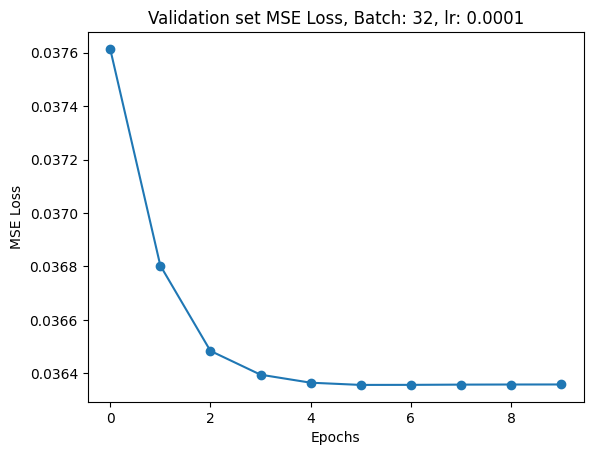

In [22]:
plt.plot(losses, marker='o')
plt.title(f"Validation set MSE Loss, Batch: {batch_size}, lr: {learning_rate}")
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
# plt.savefig(f'uniform1/loss{batch_size}lr{learning_rate}.png',bbox_inches='tight')

In [23]:
test_loss = train(model, test_dataloader, optimizer, mse_loss, inp_test.shape[0], True)
print(test_loss)
# file = open('uniform1.txt','a')
# file.write(f"test_loss: {test_loss}")
# file.close()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 496.56it/s]

0.03538804453797638


In [24]:
for inpu, zie in test_dataloader:
    outputs = model(inpu.to(device))
    for i in range(32):
        print(outputs[i],zie[i])
    break

tensor([0.5171], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.7603])
tensor([0.4292], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.6802])
tensor([0.0941], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.0074])
tensor([0.2434], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.0178])
tensor([0.4159], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.6747])
tensor([0.4993], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5848])
tensor([0.2325], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.1320])
tensor([0.4672], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3415])
tensor([0.3321], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3332])
tensor([0.5442], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3157])
tensor([0.3321], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.1054])
tensor([0.1249], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.0851])
tensor([0.2386], device='cuda:0', grad_fn=<SelectBackward0>) ten

In [25]:
out = []
for inpu, zie in test_dataloader:
    outputs = model(inpu.to(device))
    outputs = outputs.cpu().detach()
    outputs = outputs.numpy()
    out.extend(outputs)

In [47]:
out = np.array(out)

In [48]:
out.shape

(3232, 1)

In [191]:
type(z_test)

numpy.ndarray

Spearman rank correlation coefficient: 0.5529929290348412
ps-value: 0.0
Kendall rank correlation coefficient: 0.3969842070459171
pk-value: 0.0
R2_sqaure: 0.3333387422486853


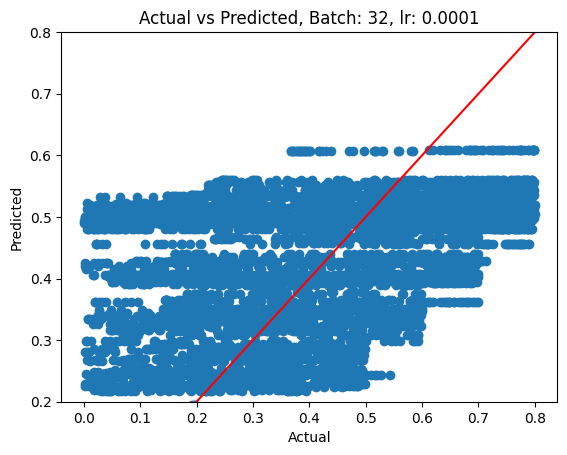

In [26]:
plt.scatter(z_test,out)
plt.title(f"Actual vs Predicted, Batch: {batch_size}, lr: {learning_rate}")
plt.xlabel('Actual')
plt.ylabel('Predicted')

p1 = max(max(out), max(z_test))
p2 = min(min(out), min(z_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.ylim((0.2,0.8))
R_sqaure = r2_score(z_test,out)
# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore", message=".*Nearly constant input.*")
#     p_corr, p_val = pearsonr(z_test, out)
# print(p_corr)
# print(p_val)

s_corr, ps_value = spearmanr(z_test, out)

print("Spearman rank correlation coefficient:", s_corr)
print("ps-value:", ps_value)

k_corr, pk_value = kendalltau(z_test, out)

print("Kendall rank correlation coefficient:", k_corr)
print("pk-value:", pk_value)

print("R2_sqaure:",R_sqaure)
# file = open('uniform1.txt','a')
# file.write(f"test_loss: {test_loss}\n")
# file.write(f"R^2: {R_sqaure}\n")
# file.write(f"Spearman rank correlation coefficient: {s_corr}\n")
# file.write(f"Kendall rank correlation coefficient: {k_corr}\n")
# # file.write(f"p_val: {p_val}")
# file.close()
# plt.savefig(f'uniform1/output{batch_size}lr{learning_rate}.png',bbox_inches='tight')